#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [2]:

import pandas as pd
from google.colab import files

uploaded = files.upload()


df = pd.read_csv(next(iter(uploaded)))

print(df.head())


Saving new_dataset.csv to new_dataset.csv
  sentiment                                               text
0  Negative  @xnausikaax oh no! where did u order from? tha...
1  Negative  A great hard training weekend is over.  a coup...
2  Negative  Right, off to work  Only 5 hours to go until I...
3  Negative                    I am craving for japanese food 
4  Negative  Jean Michel Jarre concert tomorrow  gotta work...


,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


words_to_keep = {'not', 'no', 'very', 'against', 'don', 'didn', 'doesn'}
custom_stop_words = stop_words - words_to_keep

def remove_stopwords_less_aggressive(text):

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    filtered_words = [word for word in text.split() if word not in custom_stop_words]
    return ' '.join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentiment,text
0,Negative,@xnausikaax oh no! u order from? that's horrible
1,Negative,A great hard training weekend over. couple day...
2,Negative,"Right, work Only 5 hours go I'm free xD"
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [ ]:
#ENTER YOUR CODE HERE

In [7]:
import pandas as pd
import re

def remove_handles_less_aggressive(text):

    return re.sub(r'@\w+', '', text)


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [ ]:
#ENTER YOUR CODE HERE

In [9]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer


nltk.download('punkt')

nltk.download('punkt_tab')

stemmer = PorterStemmer()

def stem_text(text):

    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)


df['text_stemmed'] = df['text'].apply(stem_text)

print(df[['text', 'text_stemmed']].head())





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  @xnausikaax oh no! where did u order from? tha...   
1  A great hard training weekend is over.  a coup...   
2  Right, off to work  Only 5 hours to go until I...   
3                    I am craving for japanese food    
4  Jean Michel Jarre concert tomorrow  gotta work...   

                                        text_stemmed  
0  @ xnausikaax oh no ! where did u order from ? ...  
1  a great hard train weekend is over . a coupl d...  
2  right , off to work onli 5 hour to go until i ...  
3                        i am crave for japanes food  
4  jean michel jarr concert tomorrow got ta work ...  


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

In [10]:
# positive_text = " ".join(df[df['sentiment'] == 'Positive']['text_stemmed'])
# negative_text = " ".join(df[df['sentiment'] == 'Negative']['text_stemmed'])

# if positive_text.strip():
#     pass
# else:
#     print("No positive words available to generate a word cloud.")


# positive_text = " ".join(df[df['sentiment'] == 'positive']['text_stemmed'])
# negative_text = " ".join(df[df['sentiment'] == 'negative']['text_stemmed'])

# !pip install wordcloud
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# # Positive Word Cloud
# wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_pos, interpolation='bilinear')
# plt.axis('off')
# plt.title('Positive Words Word Cloud')
# plt.show()

# # Negative Word Cloud
# wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_neg, interpolation='bilinear')
# plt.axis('off')
# plt.title('Negative Words Word Cloud')
# plt.show()
# print(positive_text)
# print(len(positive_text.split()))
# print(df['sentiment'].unique())



ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
#ENTER YOUR CODE HERE

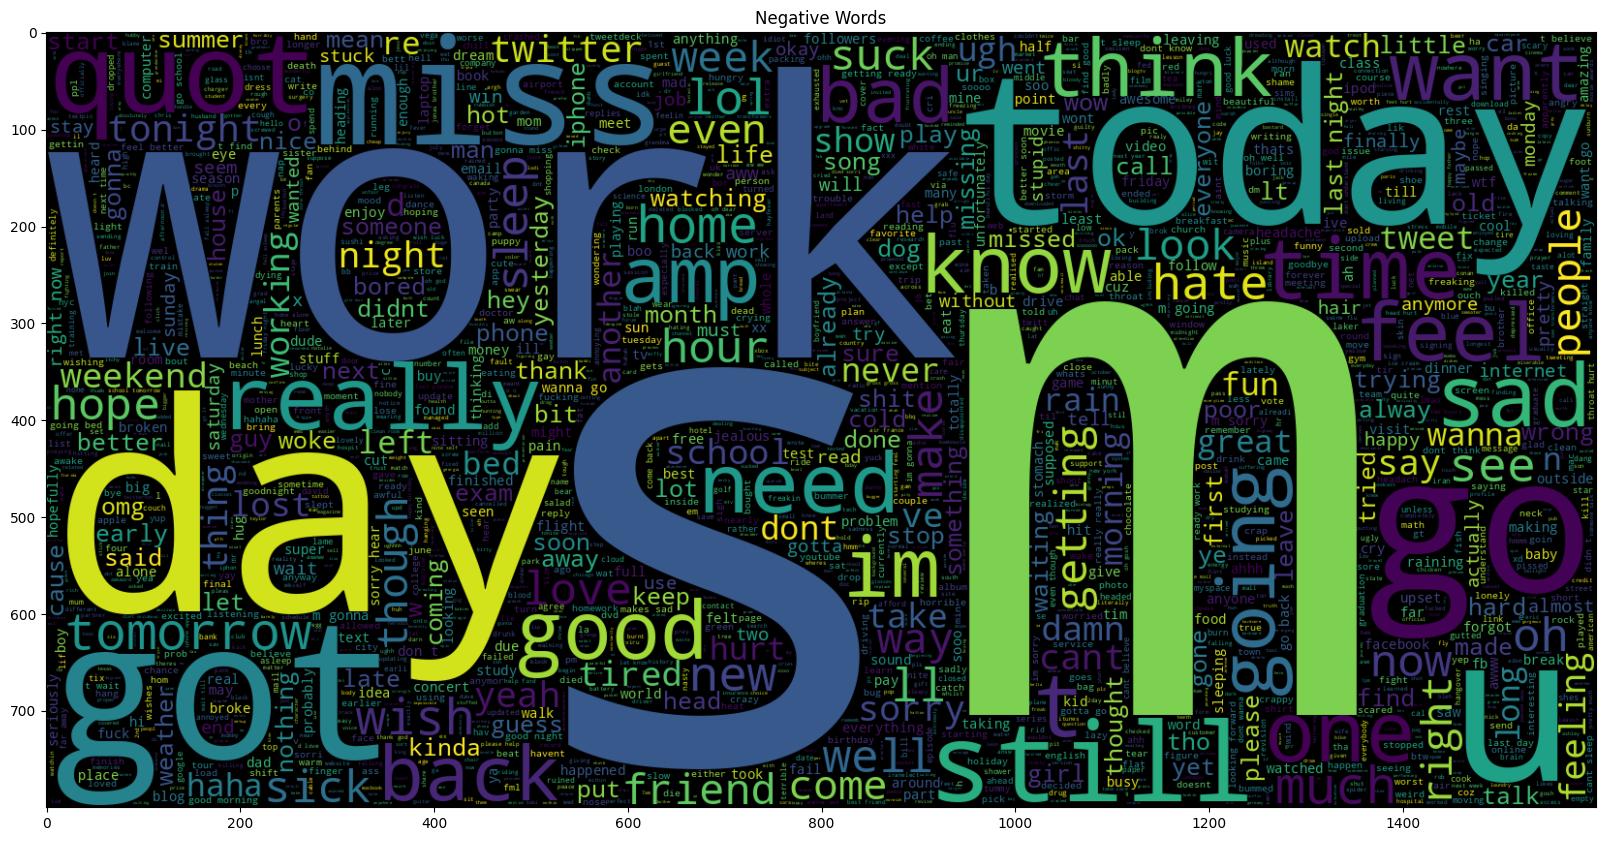

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [ ]:
#ENTER YOUR CODE HERE

In [11]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df, test_size=0.1, random_state=42)


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [ ]:
#ENTER YOUR CODE HERE

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
train_texts = train['text_stemmed'].tolist()
tokenizer.fit_on_texts(train_texts)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:", vocab_size)
train_sequences = tokenizer.texts_to_sequences(train_texts)


Vocabulary Size: 15083


**Now transform the training and testing word sequences.**

In [23]:
#ENTER YOUR CODE HERE
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['text_stemmed'].tolist())
train_sequences = tokenizer.texts_to_sequences(train['text_stemmed'].tolist())
test_sequences = tokenizer.texts_to_sequences(test['text_stemmed'].tolist())
print(train_sequences[:3])
print(test_sequences[:3])

train_sequences = tokenizer.texts_to_sequences(train['text_stemmed'].tolist())
test_sequences = tokenizer.texts_to_sequences(test['text_stemmed'].tolist())

from tensorflow.keras.utils import pad_sequences

maxlen = max(len(seq) for seq in train_sequences)

X_train = pad_sequences(train_sequences, maxlen=maxlen, padding='post',dtype='int32')
X_test = pad_sequences(test_sequences, maxlen=maxlen, padding='post',dtype='int32')
y_train = np.array(train['sentiment'].map({'Negative': 0, 'Positive': 1}))
y_test = np.array(test['sentiment'].map({'Negative': 0, 'Positive': 1}))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


[[1, 82, 69, 472, 14, 3, 4608, 837, 1150, 837, 7, 53, 12, 6, 303, 9, 27, 33, 15, 4609], [4610, 135, 1722, 83, 4611, 143, 1510, 9, 42, 140, 29, 39, 7, 133, 4612, 15, 6, 473], [27, 15, 3, 688, 10, 416, 24, 55, 374, 1, 21, 27, 259, 237, 4613, 114, 214]]
[[405, 3, 706, 1979, 10, 6, 2353, 5, 51, 4, 194, 14, 1, 41], [6, 81, 3470, 2334, 501, 23, 835, 376, 2, 25, 19, 2612, 1, 2426, 2, 651, 350, 15, 3, 510], [752, 1, 85, 41, 180, 8, 524, 51, 1395, 23, 72, 1, 22, 16, 3506, 148, 125, 666, 32]]
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.5143 - loss: 0.6900 - val_accuracy: 0.4920 - val_loss: 0.7046
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.5240 - loss: 0.6892 - val_accuracy: 0.5080 - val_loss: 0.6931
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.4901 - loss: 0.6950 - val_accuracy: 0.4920 - val_loss: 0.6948
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.5033 - loss: 0.6946 - val_accuracy: 0.5080 - val_loss: 0.6930
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.5006 - loss: 0.6947 - val_accuracy: 0.4920 - val_loss: 0.6933
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4963 - loss: 0.6932
Test Accuracy: 0.49


Training data:
[1, 25, 411, 5140, 954, 1222, 954, 20, 894, 107, 5141]
Testing data:
[322, 677, 2477, 2488, 181, 618]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [ ]:
#ENTER YOUR CODE HERE
#already done

Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1   25  411
 5140  954 1222  954   20  894  107 5141]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  322  677 2477 2488  181  618]


**Label encode y.**

In [ ]:
#ENTER YOUR CODE HERE

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [28]:
import tensorflow as tf
import numpy as np
!wget --no-check-certificate https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-06-17 20:58:29--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-17 20:58:30--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.12MB/s    in 2m 58s  

2025-06-17 21:01:28 (4.62 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: g

In [31]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index
MAX_SEQUENCE_LENGTH = X_train.shape[1]


for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(15083,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)


Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [33]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 36, 300)           4053300   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 36, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

**Train the model on the train split, and validate it on the test split.**

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.5002 - loss: 0.6946 - val_accuracy: 0.5180 - val_loss: 0.6809
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.5189 - loss: 0.6833 - val_accuracy: 0.5080 - val_loss: 0.6925
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.4951 - loss: 0.6943 - val_accuracy: 0.5080 - val_loss: 0.6795
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.5932 - loss: 0.6463 - val_accuracy: 0.6080 - val_loss: 0.6761
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.6908 - loss: 0.6154 - val_accuracy: 0.5800 - val_loss: 0.6992
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.6864 - loss: 0.6049 - val_accuracy: 0.5740 - val_loss: 0.6925
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.6938 - loss: 0.5949 - val_accuracy: 0.5980 - val_loss: 0.7454
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7459 - loss: 0.5633 - 

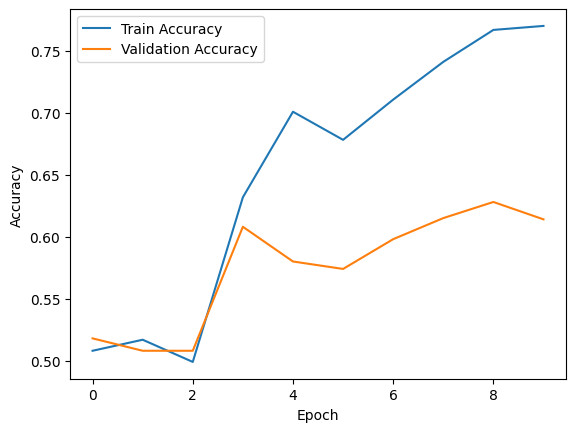

In [34]:
#ENTER YOUR CODE HERE
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10
9/9 [==============================] - 39s 3s/step - loss: 0.6791 - accuracy: 0.5733 - val_loss: 0.6374 - val_accuracy: 0.6330
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 0.6207 - accuracy: 0.6628 - val_loss: 0.6137 - val_accuracy: 0.6540
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 0.5882 - accuracy: 0.6919 - val_loss: 0.5981 - val_accuracy: 0.6700
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 0.5676 - accuracy: 0.7080 - val_loss: 0.5911 - val_accuracy: 0.6670
Epoch 5/10
9/9 [==============================] - 22s 3s/step - loss: 0.5480 - accuracy: 0.7160 - val_loss: 0.5849 - val_accuracy: 0.6890
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 0.5273 - accuracy: 0.7290 - val_loss: 0.5836 - val_accuracy: 0.6880
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.5094 - accuracy: 0.7477 - val_loss: 0.5846 - val_accuracy: 0.7070
Epoch 8/10
9/9 [==================

**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

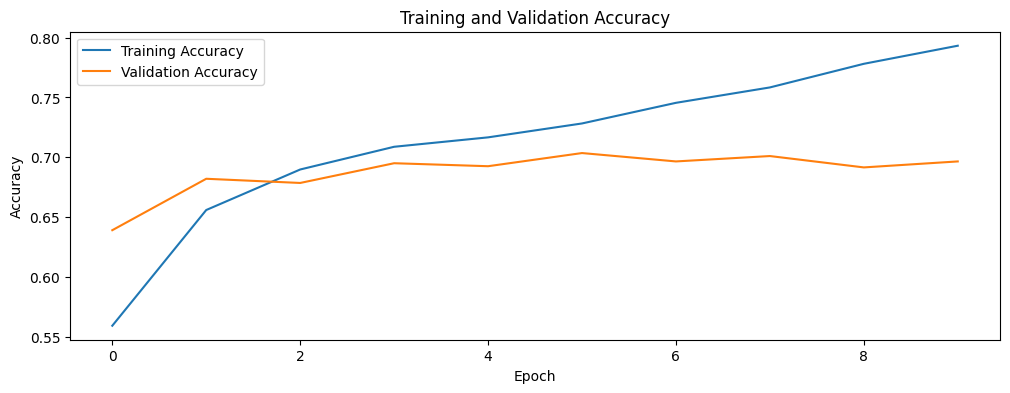

In [ ]:
#ENTER YOUR CODE HERE

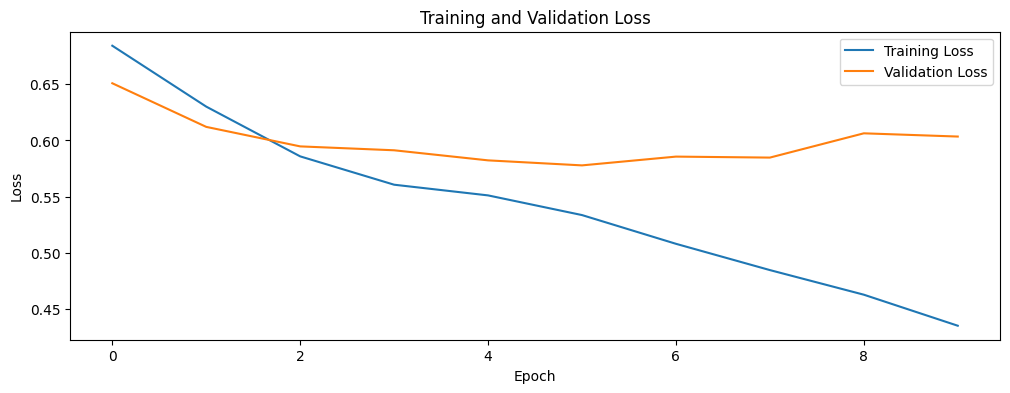

**Lets see what the accuracy of the model is.**

In [35]:
#ENTER YOUR CODE HERE
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

y_pred_labels = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_labels, target_names=['Negative', 'Positive']))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

    Negative       0.71      0.37      0.48       492
    Positive       0.58      0.85      0.69       508

    accuracy                           0.61      1000
   macro avg       0.64      0.61      0.59      1000
weighted avg       0.64      0.61      0.59      1000



63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1012
           1       0.68      0.73      0.70       988

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [36]:
#ENTER YOUR CODE HERE
y_pred = model.predict(X_test)

y_pred_labels = (y_pred > 0.5).astype(int)

label_map = {0: 'Negative', 1: 'Positive'}
decoded_predictions = [label_map[label] for label in y_pred_labels.flatten()]

reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}

def decode_sequence(sequence):
    return ' '.join([reverse_word_index.get(idx, '') for idx in sequence if idx != 0])

for i in range(5):
    print("Original text:", decode_sequence(X_test[i]))
    print("Predicted sentiment:", decoded_predictions[i])
    print("Actual sentiment:", label_map[y_test[i]])
    print("---")



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Original text: found the perfect titl for my portfolio it from a song that i love
Predicted sentiment: Positive
Actual sentiment: Positive
---
Original text: my new anti viru ive just instal seem to be so effect i struggl to open anyth on the internet
Predicted sentiment: Positive
Actual sentiment: Negative
---
Original text: fact i still love him you learn from mistak just hope i do n't repeat them again 9 day
Predicted sentiment: Positive
Actual sentiment: Negative
---
Original text: i think i got ta make a new twitter account cuz my quot quot one is serious all fuck up
Predicted sentiment: Negative
Actual sentiment: Negative
---
Original text: end of the weekend back to work tomorrow we need longer weekend
Predicted sentiment: Positive
Actual sentiment: Negative
---


The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  402 2498  165   91  201    5]
1/1 [==============================] - 1s 835ms/step
The predicted sentiment is: ['Negative']
The original sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#ENTER YOUR CODE HERE

['dad', 'fever', 'again', 'not', 'looking', 'good']


**We can try this on a random string as well.**

In [ ]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

After removal of stopwords: 0    I hate everyone earth!
dtype: object
After removal of punctuation: 0    I hate everyone earth 
dtype: object
After stemming: 0    i hate everyone earth 
dtype: object
After tokenization: [[1, 100, 138, 2693]]
After padding: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1  100  138 2693]]
1/1 [==============================] - 0s 58ms/step
The predicted sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## GOOD JOB!